# List

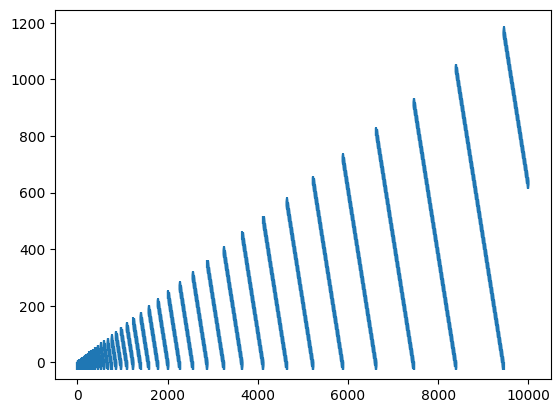

In [1]:
import matplotlib.pyplot as plt

l = list()
remains = []
init_size = l.__sizeof__()
for _ in range(10000):
    l.append(1)
    after_size = l.__sizeof__()
    remain_items = (after_size - init_size) / 8 - len(l)
    remains.append(remain_items)

plt.scatter(list(range(10000)), remains, marker=3)

# Tuple

In [2]:
t = (1, 2, 3)
t[0] = 2

TypeError: 'tuple' object does not support item assignment

# Initialization time comparison between a list and a tuple

In [3]:
%%timeit
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

35.7 ns ± 0.552 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [4]:
%%timeit
t = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

6.18 ns ± 0.0314 ns per loop (mean ± std. dev. of 7 runs, 100,000,000 loops each)


# Dict & Set

In [5]:
d = {'key1': 1, 'key2': 2}
s = {'key1', 'key2'}

# Hash function

In [6]:
import string

class BadHash(str):
    def __hash__(self):
        return 42
    
class GoodHash(str):
    def __hash__(self) -> int:
        return ord(self[1]) + 26 * ord(self[0]) - 2619

baddict = set()
gooddict = set()

for i in string.ascii_lowercase:
    for j in string.ascii_lowercase:
        key = i + j
        baddict.add(BadHash(key))
        gooddict.add(GoodHash(key))

In [7]:
%%timeit
for key in ['zz', 'yy', 'xx']:
    BadHash(key) in baddict

25.6 µs ± 86.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%%timeit
for key in ['zz', 'yy', 'xx']:
    GoodHash(key) in gooddict

791 ns ± 11.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
